# Explore notebook

In [1]:
from imports import *
import prepare

import acquire
import warnings
warnings.filterwarnings('ignore')

canva_palette = canva_palette = ['#FFB000', '#375F00', '#707E00', '#B39B00', '#002729']
#background_color = '#B39B00'
#sns.set(rc={'figure.facecolor': background_color, 'axes.facecolor': background_color})

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = acquire.get_data()

Reading from local CSV...


In [3]:
df = prepare.prep_data(df)

In [4]:
train, test = prepare.split_data(df)

train n= 1238
test n= 496


In [5]:
train.shape

(1238, 23)

In [6]:
test.shape

(496, 23)

In [7]:
furniture = train[train.category == 'Furniture']
technology = train[train.category == 'Technology']
office = train[train.category == 'Office Supplies']

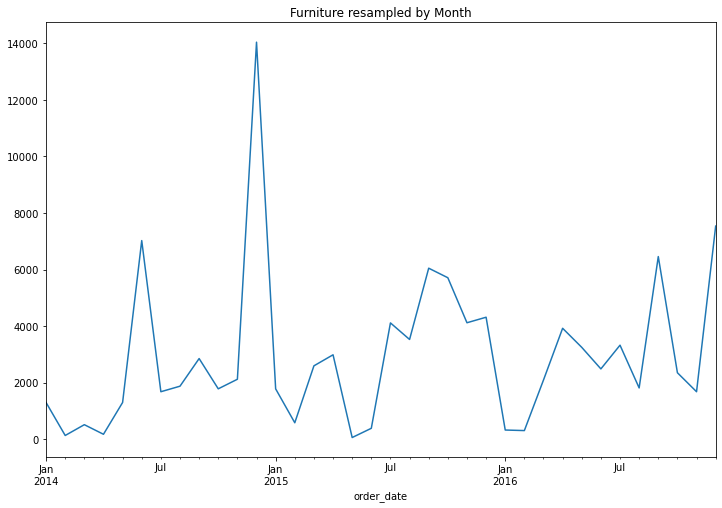

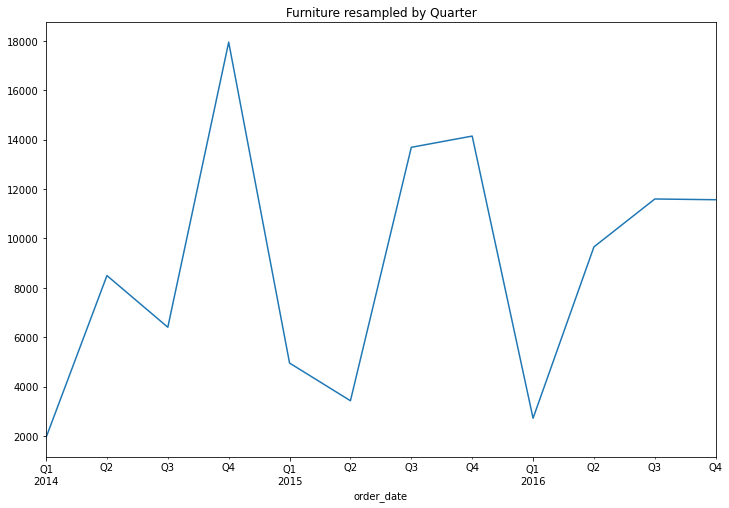

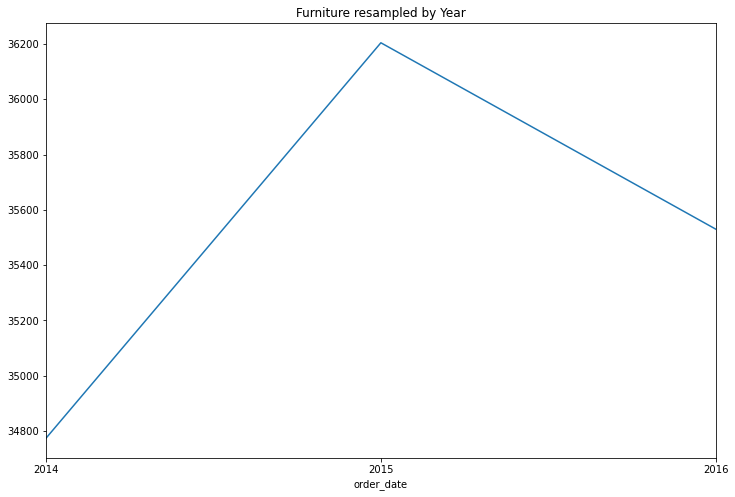

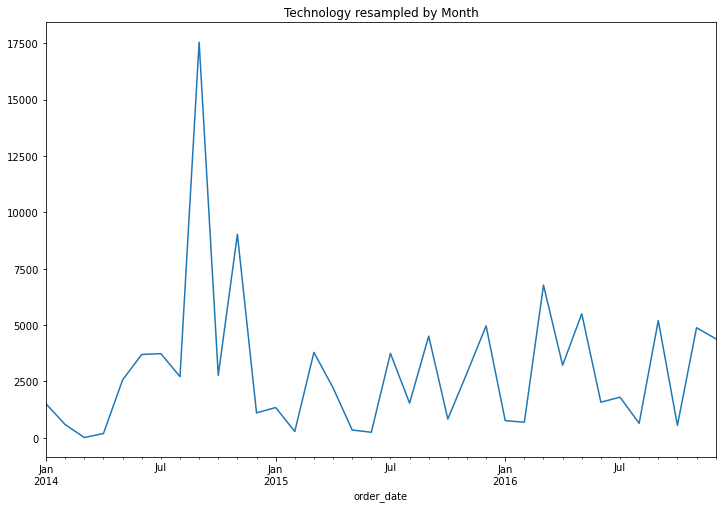

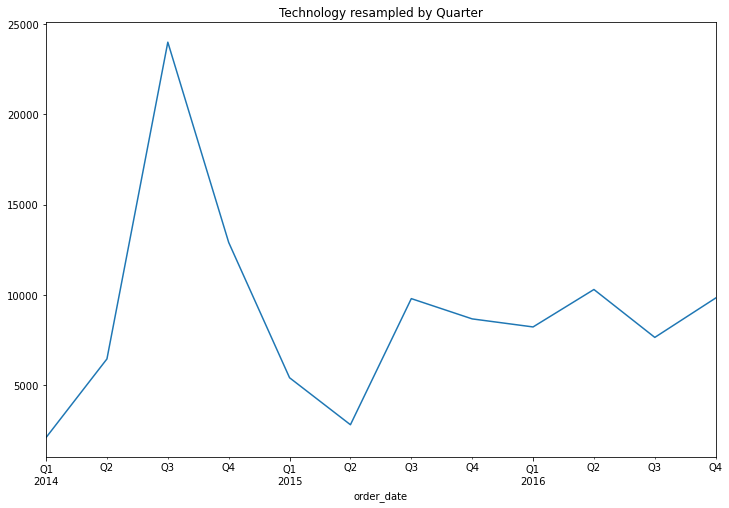

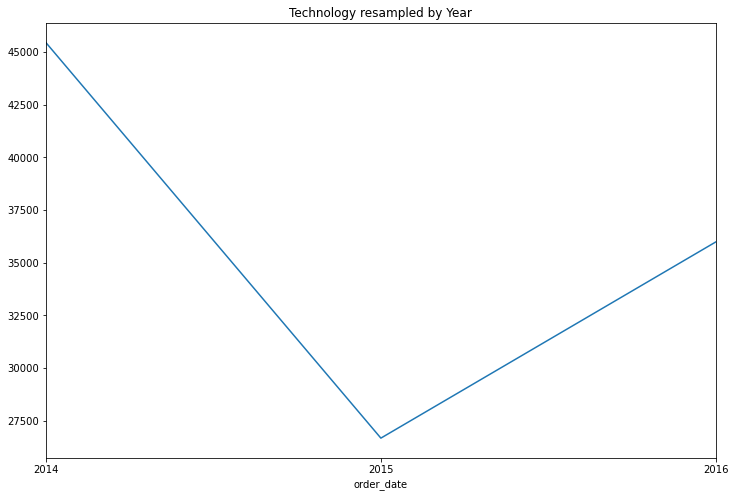

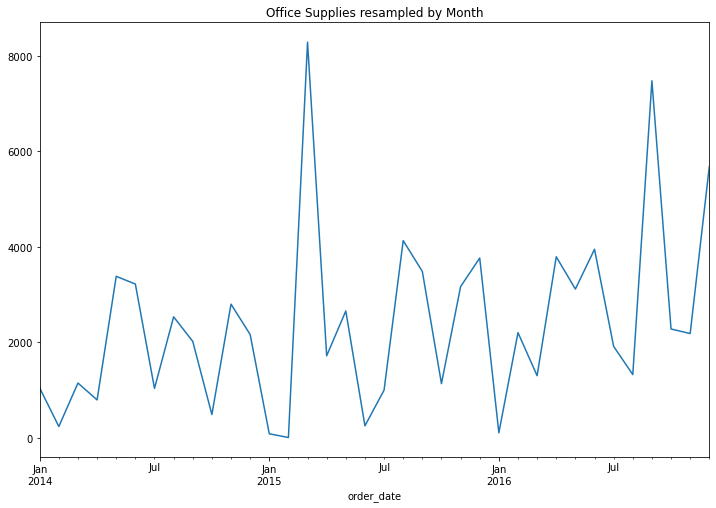

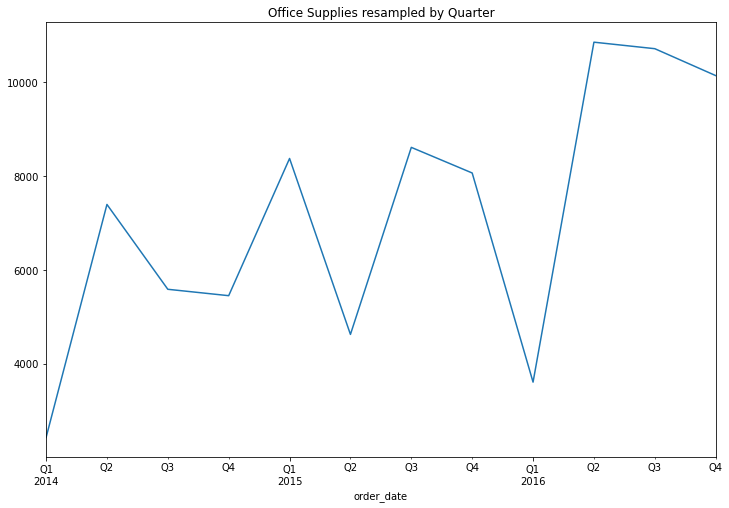

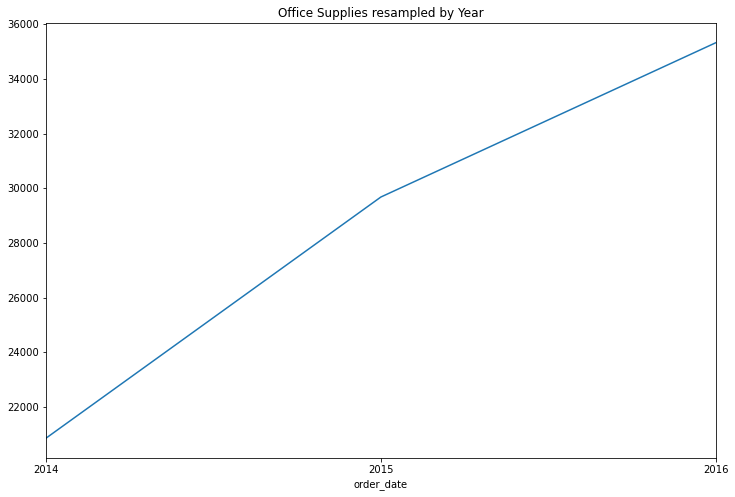

In [8]:
categories = [furniture, technology, office]
category_names = ['Furniture', 'Technology', 'Office Supplies']

periods = ['M', 'Q', 'Y']
period_names = ['Month', 'Quarter', 'Year']

for cat, cat_name in zip(categories, category_names):
    for per, per_name in zip(periods, period_names):
        plt.figure(figsize=(12,8))
        cat['sales'].resample(per).sum().plot()
        plt.title(f'{cat_name} resampled by {per_name}')

#### Which products have the most/least sales volume in the last year?

In [9]:
products_2017 = df['2017'].groupby(by='product_id').sum()[['sales', 'profit', 'quantity']]
products_2017['profit_per_product'] = products_2017.profit / products_2017.quantity
products_2017.sort_values(by='quantity', ascending=False)

,sales,profit,quantity,profit_per_product
product_id,,,,
OFF-AP-10002684,1799.384,267.4760,18.0,14.859778
OFF-AR-10003514,65.272,19.9398,17.0,1.172929
OFF-BI-10001036,56.668,-16.4520,16.0,-1.028250
FUR-FU-10001290,673.600,215.5520,16.0,13.472000
OFF-PA-10002377,137.376,50.9480,14.0,3.639143
...,...,...,...,...
OFF-ST-10003722,14.030,4.0687,1.0,4.068700
OFF-EN-10002504,21.744,7.3386,1.0,7.338600
OFF-AR-10000390,3.304,1.0738,1.0,1.073800


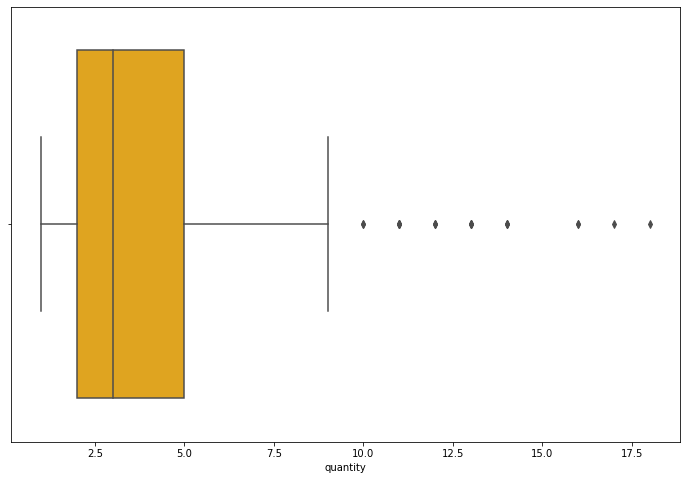

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(products_2017.quantity, palette=canva_palette)
plt.show()

In [11]:
low_vol_prods = products_2017[products_2017.quantity <= 5]
low_vol_prods

,sales,profit,quantity,profit_per_product
product_id,,,,
FUR-BO-10001337,514.1650,-30.2450,5.0,-6.0490
FUR-BO-10001619,84.9800,18.6956,1.0,18.6956
FUR-BO-10002206,119.8330,-12.6882,1.0,-12.6882
FUR-BO-10002545,782.9400,203.5644,3.0,67.8548
FUR-BO-10002824,205.3328,-36.2352,2.0,-18.1176
...,...,...,...,...
TEC-PH-10004536,323.9760,20.2485,3.0,6.7495
TEC-PH-10004586,863.8800,107.9850,3.0,35.9950
TEC-PH-10004614,207.0000,51.7500,3.0,17.2500


In [12]:
low_vol_prods[low_vol_prods.profit_per_product == low_vol_prods.profit_per_product.max()]

,sales,profit,quantity,profit_per_product
product_id,,,,
TEC-MA-10000822,3059.982,679.996,2.0,339.998


### Which category has highest profit per product?

In [13]:
# average sales_per_product by category
train.groupby('category').mean()[['profit_per_product']]

,profit_per_product
category,
Furniture,1.668842
Office Supplies,4.773817
Technology,20.180264


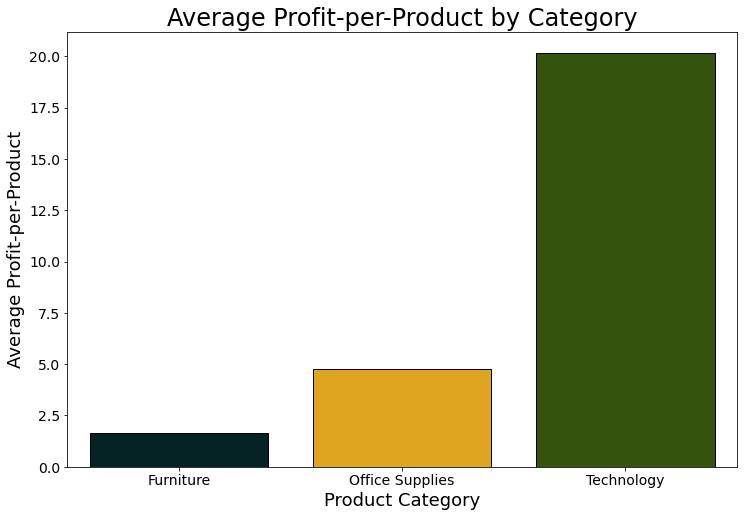

In [14]:
plt.figure(figsize=(12,8))
canva_palette = ['#002729', '#FFB000', '#375F00', '#707E00', '#B39B00']
sns.barplot(data=train, x='category', y='profit_per_product', 
            ci=None, ec='black', palette=canva_palette)
plt.title('Average Profit-per-Product by Category', fontsize=24)
plt.ylabel('Average Profit-per-Product', fontsize=18)
plt.xlabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')
plt.show()

#### Question: Is the difference statistically significant?

In [48]:
# !!! VARIANCE NOT EQUAL !!!


# Levene test
# H0 is that the variances are equal

α=.05
tech=train[train.category=='Technology'].profit
furn=train[train.category=='Furniture'].profit
offs=train[train.category=='Office Supplies'].profit
ttf,ptf = stats.levene(tech,furn)
tto,pto = stats.levene(tech,offs)
tfo,pfo = stats.levene(furn,offs)
if ptf < α:
	print(f'Most likely: H_1')
else:
	print('Most likely: H_0')
if pto < α:
	print(f'Most likely: H_1')
else:
	print('Most likely: H_0')
if pfo < α:
	print(f'Most likely: H_1')
else:
	print('Most likely: H_0')

Most likely: H_0
Most likely: H_1
Most likely: H_1


$ H_0 = \textrm{"The average profit is EQUAL for all categories." }$  
$ H_1 = \textrm{"The average profit is NOT EQUAL for all categories." }$
#### Answer: Yes, there is a statistcal difference between profits from different categories.

In [47]:
# Kruskal-Wallis H-test for independent samples
# compare profit means from the 3 categories

kw_stat,p=stats.kruskal(tech,furn,offs)

if p < α:
	print(f'Most likely: H_1')
else:
	print('Most likely: H_0')

Most likely: H_1


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-11-08 to 2016-07-10
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            1238 non-null   object        
 1   order_date          1238 non-null   datetime64[ns]
 2   ship_date           1238 non-null   datetime64[ns]
 3   ship_mode           1238 non-null   object        
 4   customer_id         1238 non-null   object        
 5   segment             1238 non-null   object        
 6   country             1238 non-null   object        
 7   city                1238 non-null   object        
 8   state               1238 non-null   object        
 9   postal_code         1238 non-null   float64       
 10  product_id          1238 non-null   object        
 11  sales               1238 non-null   float64       
 12  quantity            1238 non-null   float64       
 13  discount            1238 non-n

### Which category has lowest sales volume per product?

In [17]:
# total volume of sales by category
train.groupby('category').sum()[['quantity']]

,quantity
category,
Furniture,1018.0
Office Supplies,2855.0
Technology,891.0


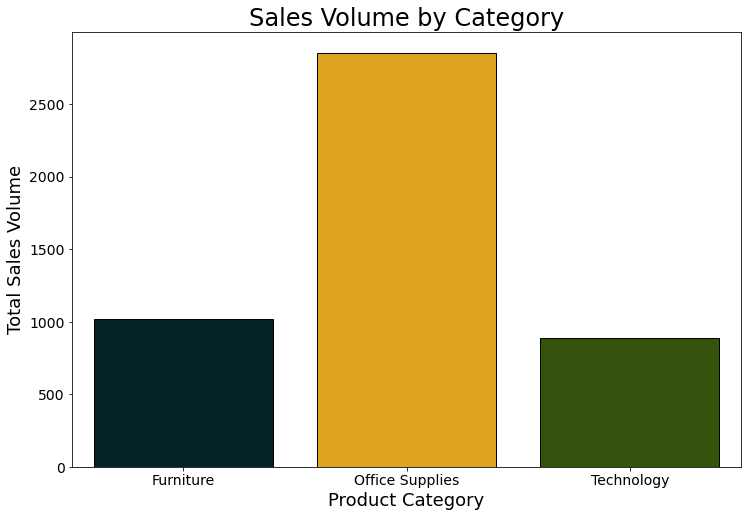

In [18]:
plt.figure(figsize=(12,8))
canva_palette = ['#002729', '#FFB000', '#375F00', '#707E00', '#B39B00']
sns.barplot(data=train, x='category', y='quantity', 
            estimator=sum, ci=None, ec='black', palette=canva_palette)
plt.title('Sales Volume by Category', fontsize=24)
plt.ylabel('Total Sales Volume', fontsize=18)
plt.xlabel('Product Category', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# some standard explorations

#### findings:
- sales/profits tend to be:
    - higher later in the year
    - lower in the middle of the week
- seasonal decomposition shows an upward trend, though this trend is hard to see in the raw data

### univariate

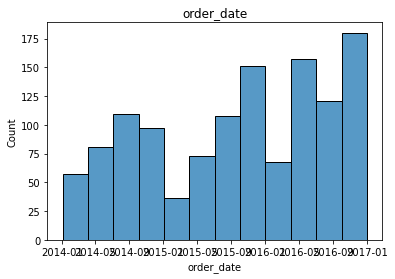

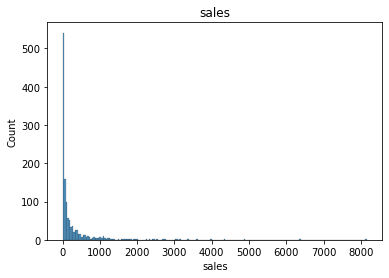

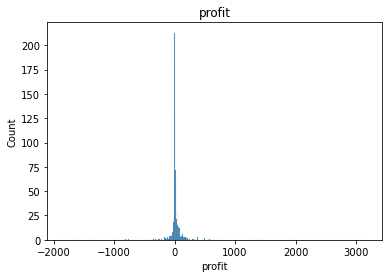

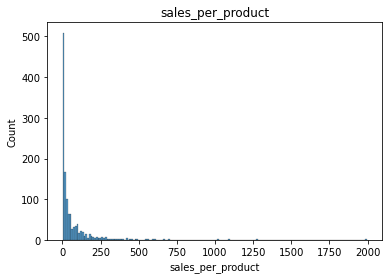

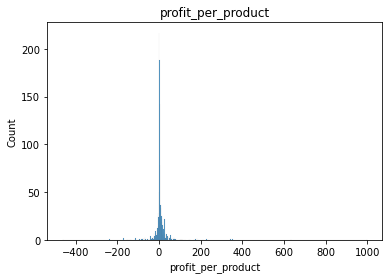

In [19]:
cols = ['order_date', 'sales', 'profit', 'sales_per_product', 'profit_per_product',]

for col in cols:
    sns.histplot(train[col])
    plt.title(col)
    plt.show()

## bivariate

#### sales and profit over time - hue=category

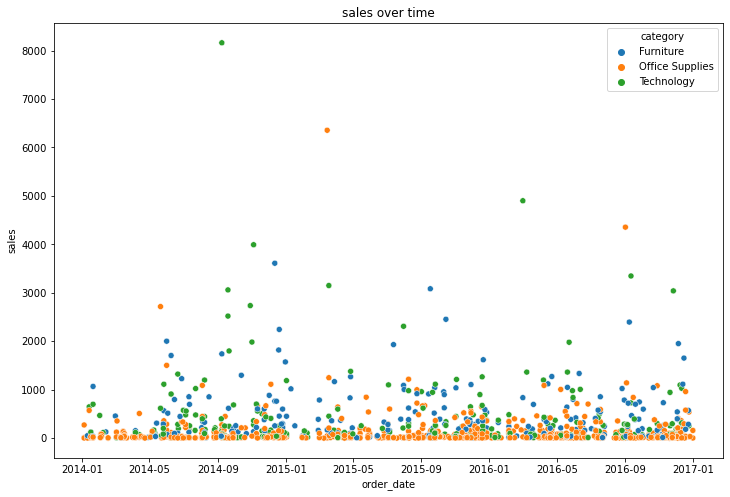

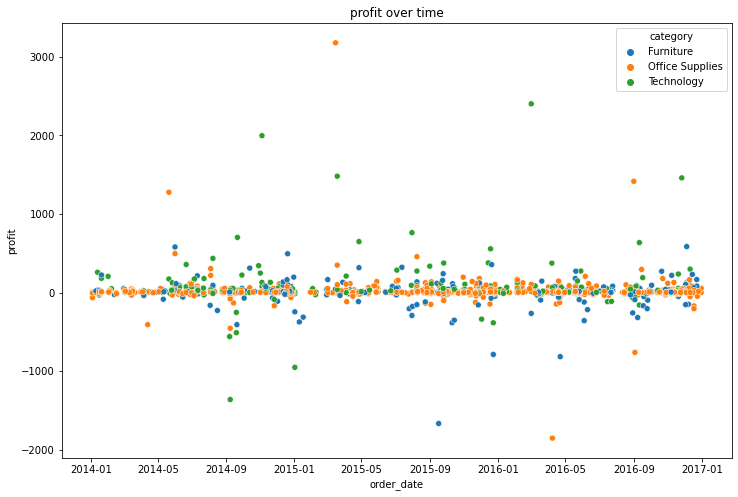

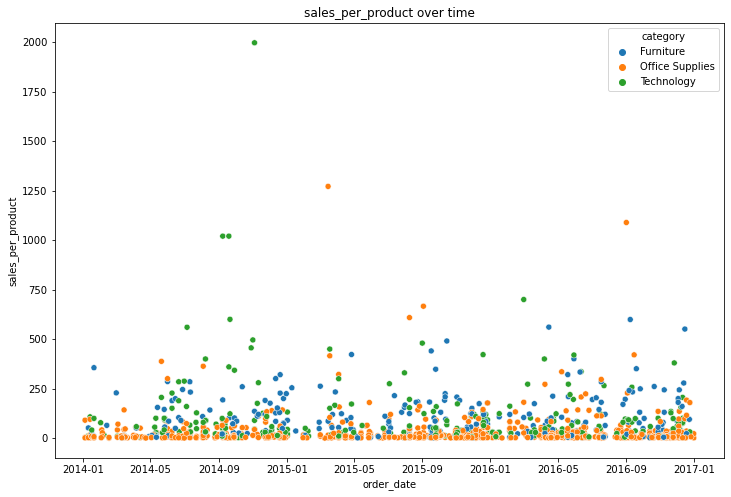

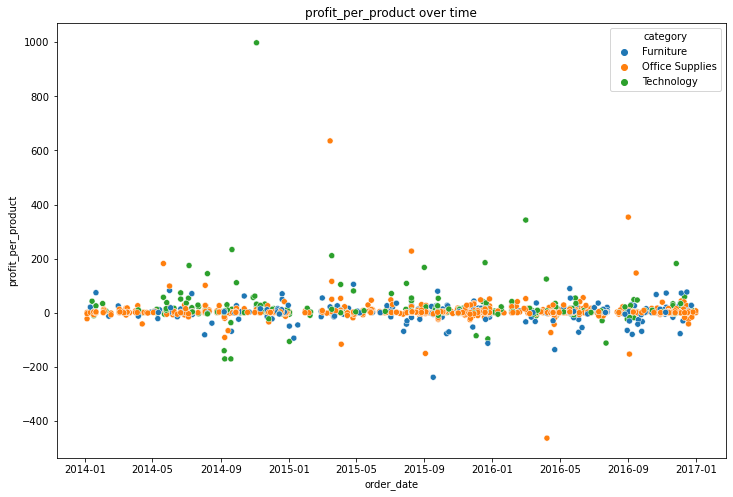

In [20]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='category')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=region

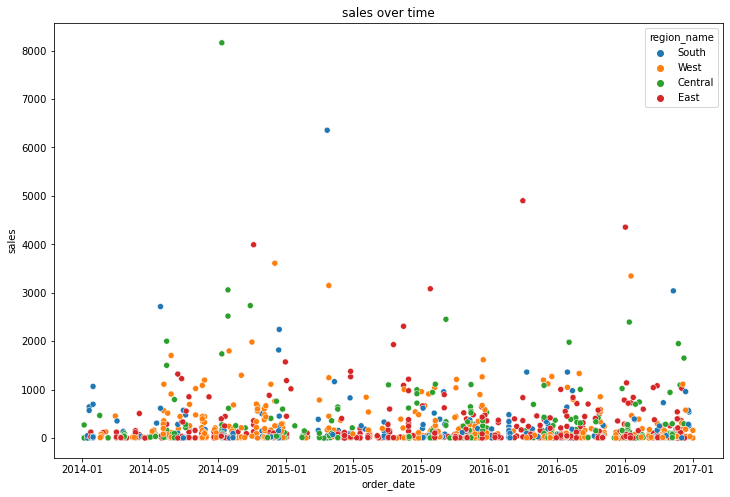

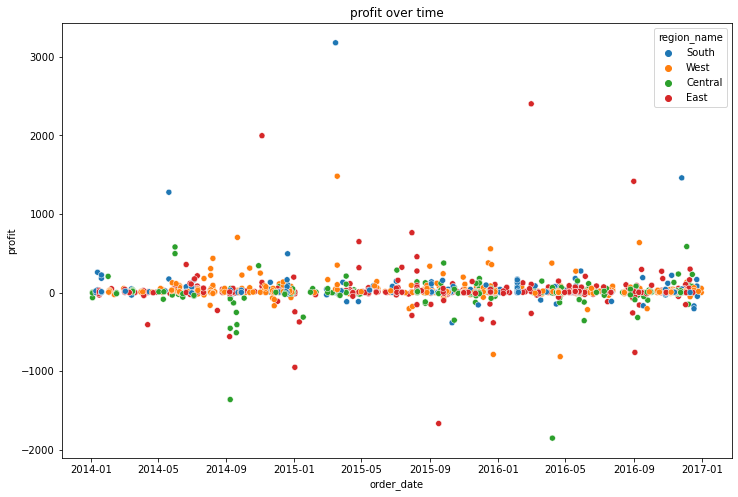

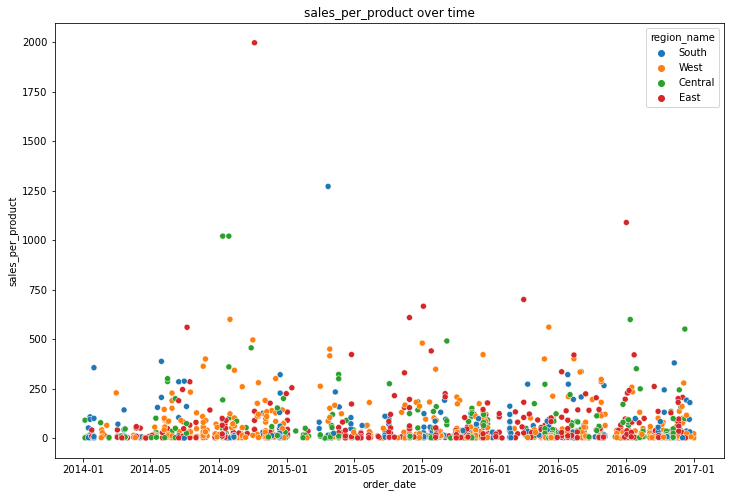

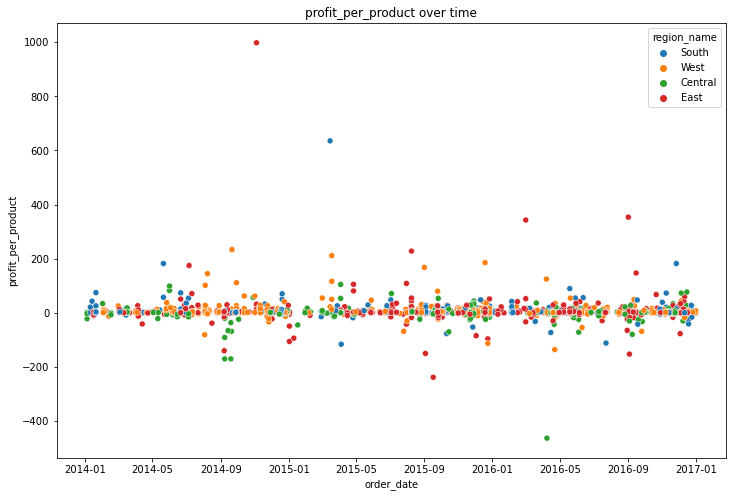

In [21]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='region_name')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=segment

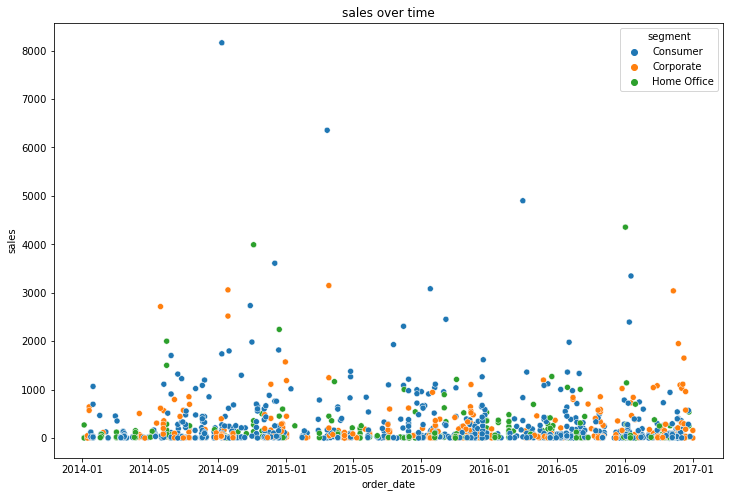

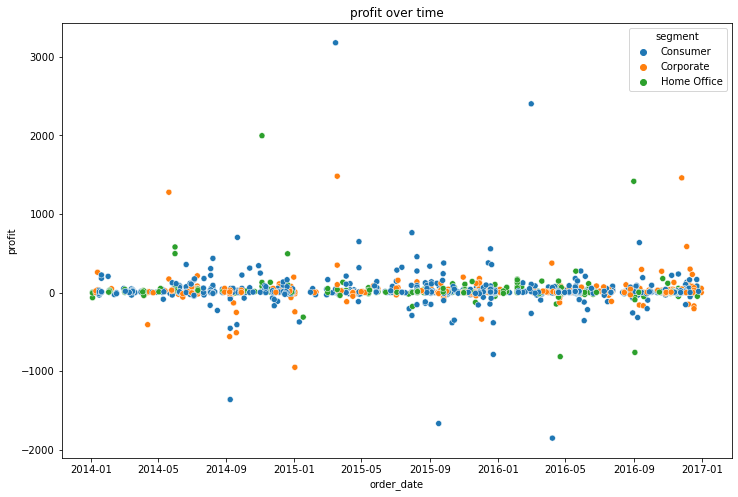

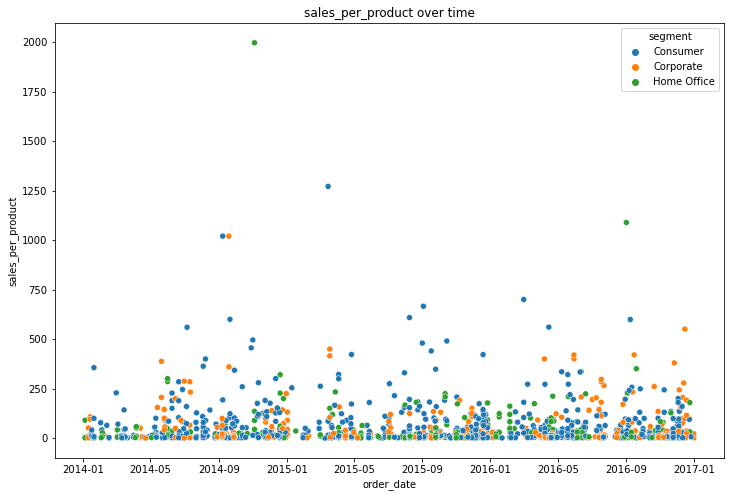

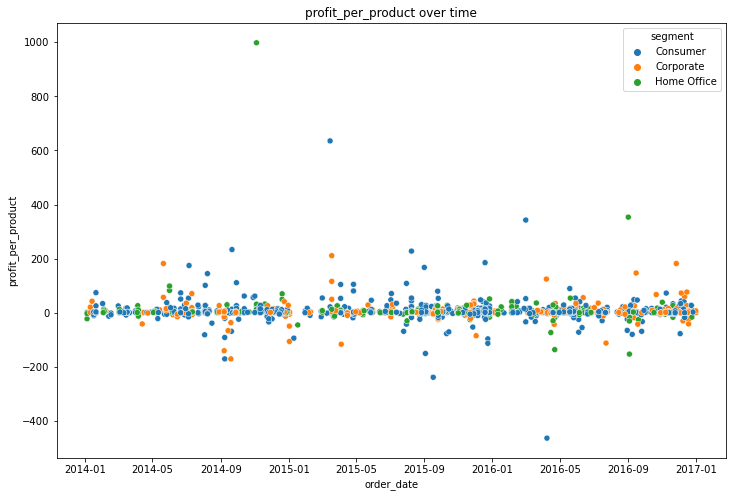

In [22]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='segment')
    plt.title(f'{col} over time')
    plt.show()

#### sales and profit over time - hue=ship_mode

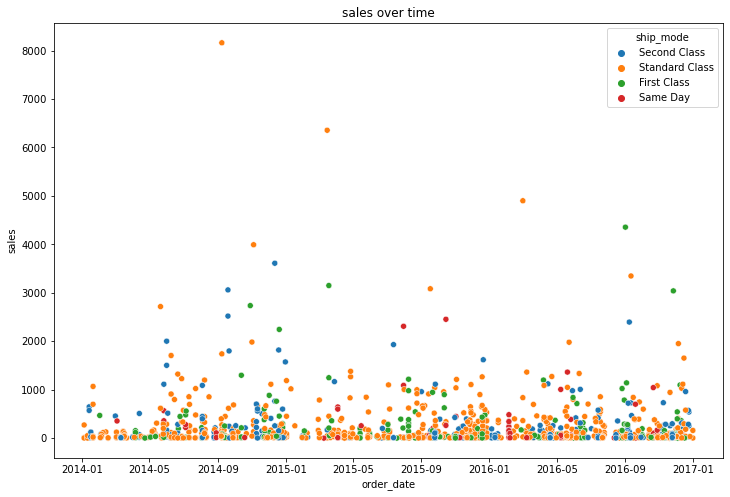

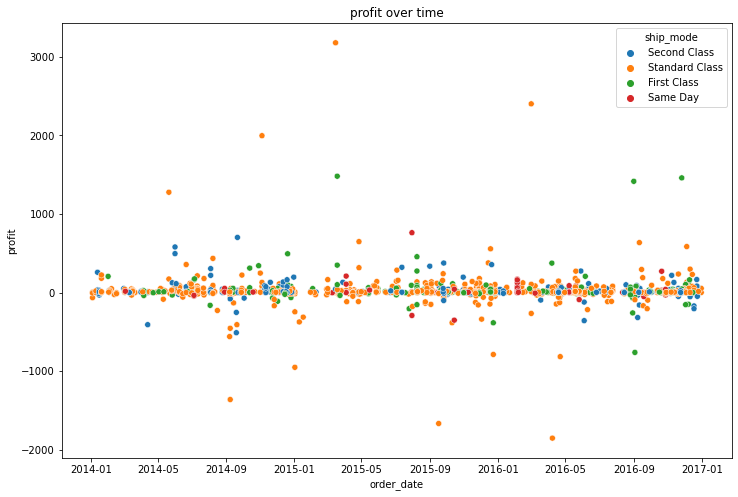

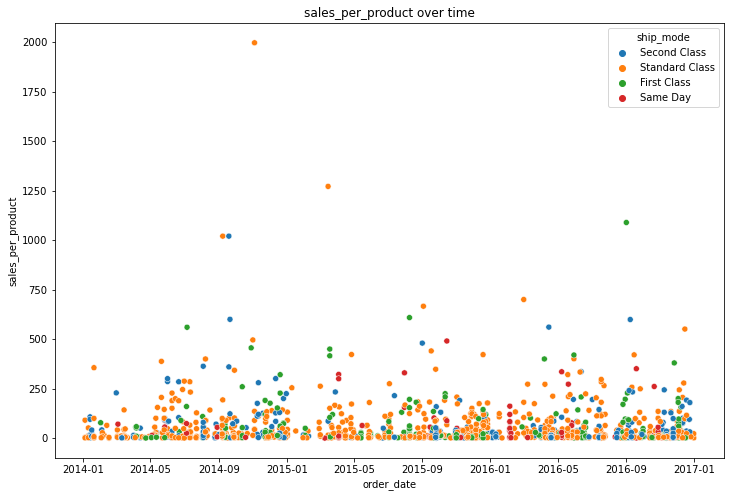

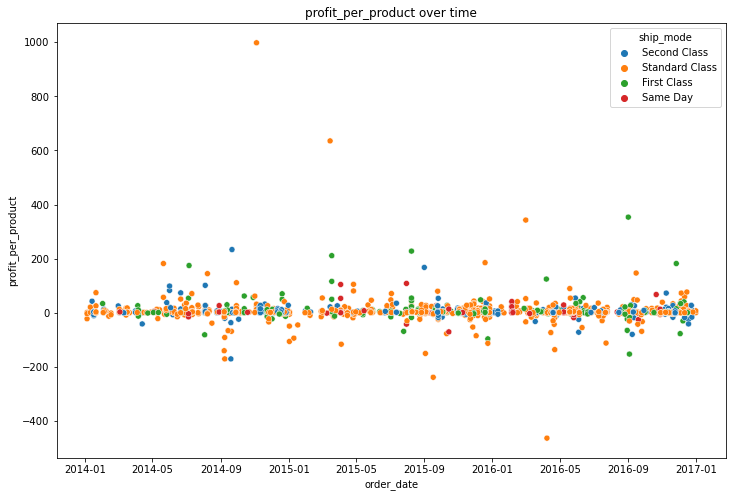

In [23]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    plt.figure(figsize=(12,8))
    sns.scatterplot(data=train, x=train.index, y=col, hue='ship_mode')
    plt.title(f'{col} over time')
    plt.show()

#### sales volume by category

#### sales and profit by category

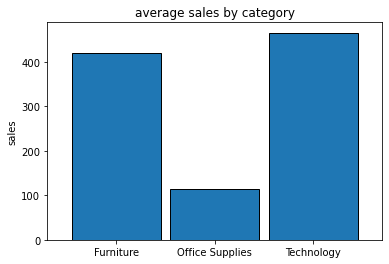

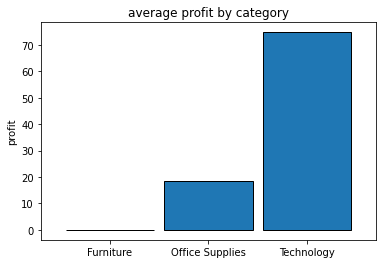

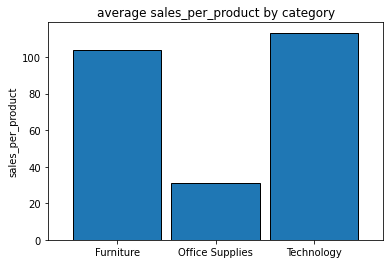

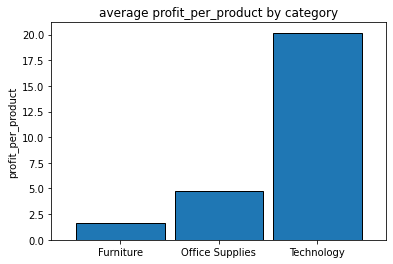

In [24]:
for col in cols:
    train.groupby('category')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by category')
    plt.show()

#### sales and profit by region

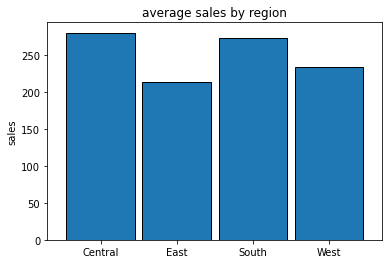

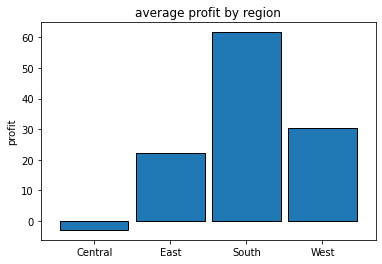

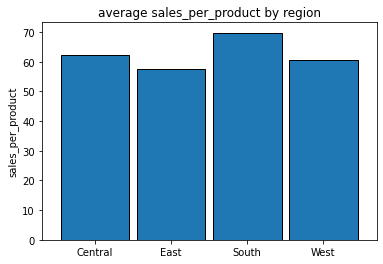

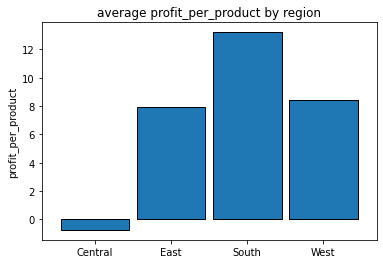

In [25]:
for col in cols:
    train.groupby('region_name')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by region')
    plt.show()

## time series exploration

#### since there are multiple observations on any given day, time series explorations don't make sense unless we resample by day

In [26]:
train_resampled = train.resample('D').sum()

#### averages by month

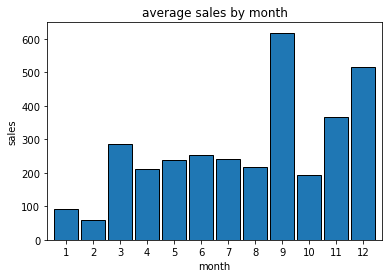

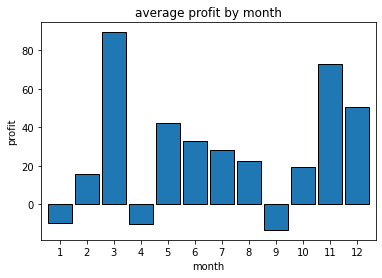

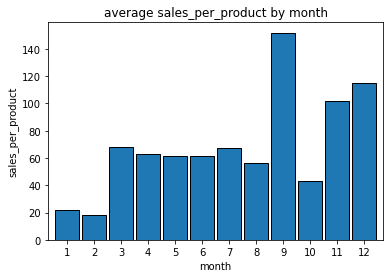

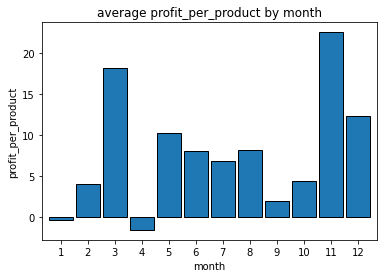

In [27]:
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']
for col in cols:
    train_resampled[col].groupby(train_resampled.index.month).mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel('month')
    plt.ylabel(col)
    plt.title(f'average {col} by month')
    plt.show()


#### averages by weekday

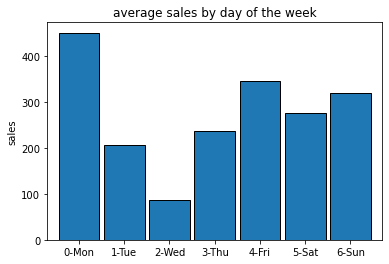

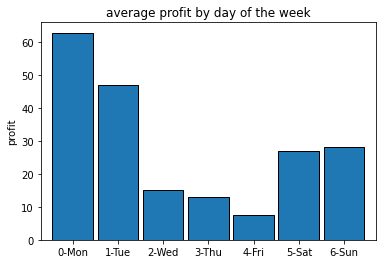

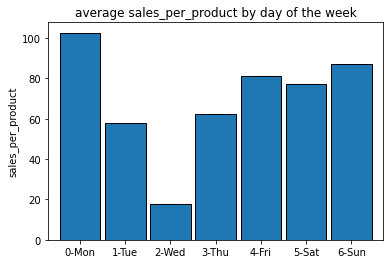

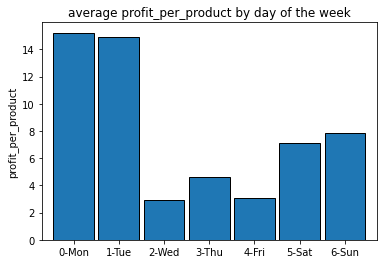

In [28]:
train_resampled['weekday'] = train_resampled.index.weekday.astype(str) + '-' + train_resampled.index.strftime('%a')
cols = ['sales', 'profit', 'sales_per_product', 'profit_per_product']

for col in cols:
    train_resampled.groupby('weekday')[col].mean().plot.bar(rot=0, width=.9, ec='black')
    plt.xlabel(None)
    plt.ylabel(col)
    plt.title(f'average {col} by day of the week')
    plt.show()

#### resampled averages

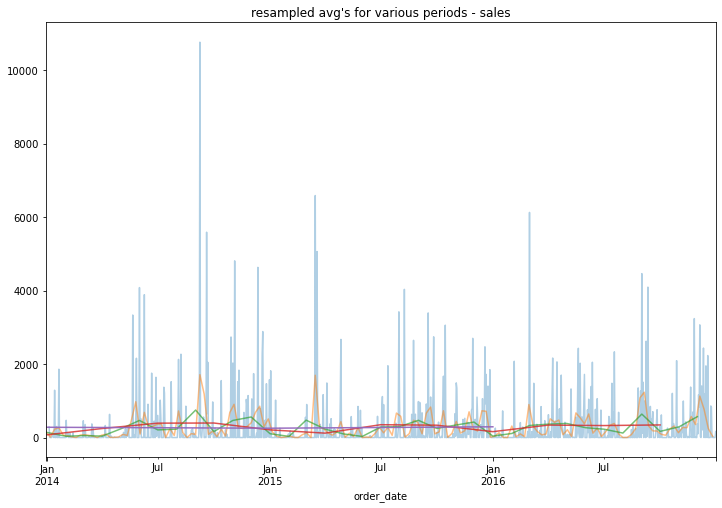

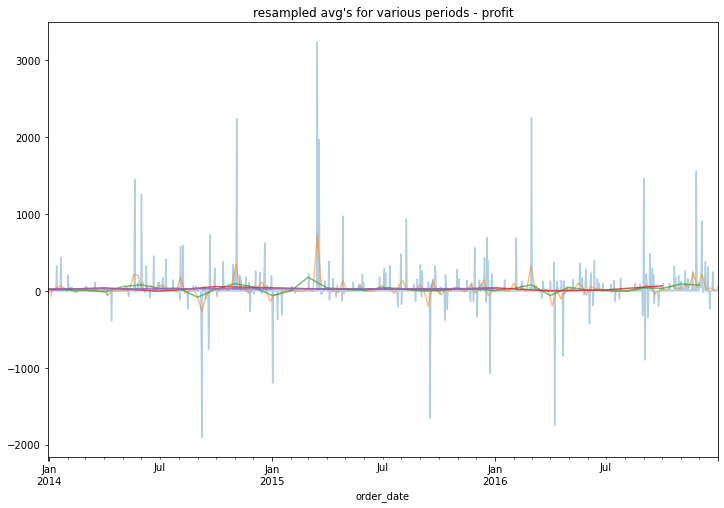

In [29]:
periods = ['D', 'W', 'M','Q', 'Y']
cols = ['sales', 'profit']
for col in cols:
    plt.figure(figsize=(12,8))
    plt.title(f'resampled avg\'s for various periods - {col}')
    alpha = .2
    for per in periods:
        alpha += .15
        train_resampled[col].resample(per).mean().plot(alpha=alpha) 
    plt.show()

#### change from period-to-period

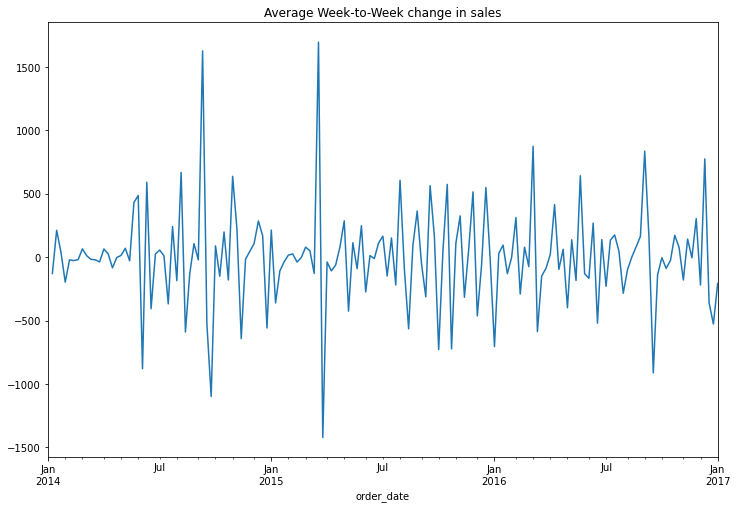

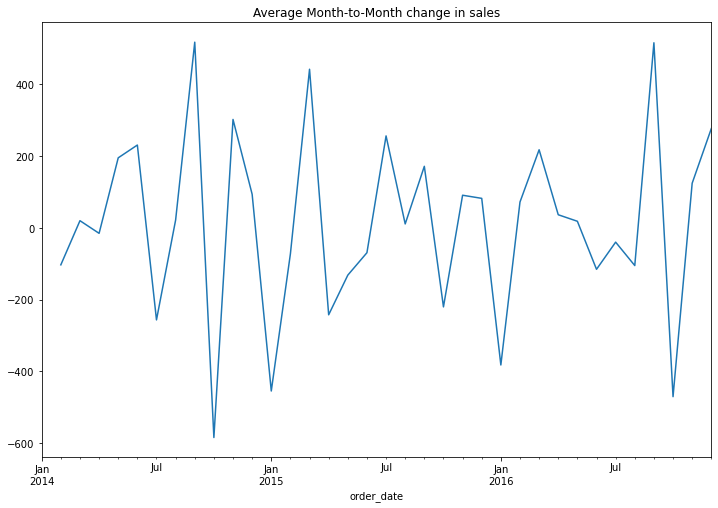

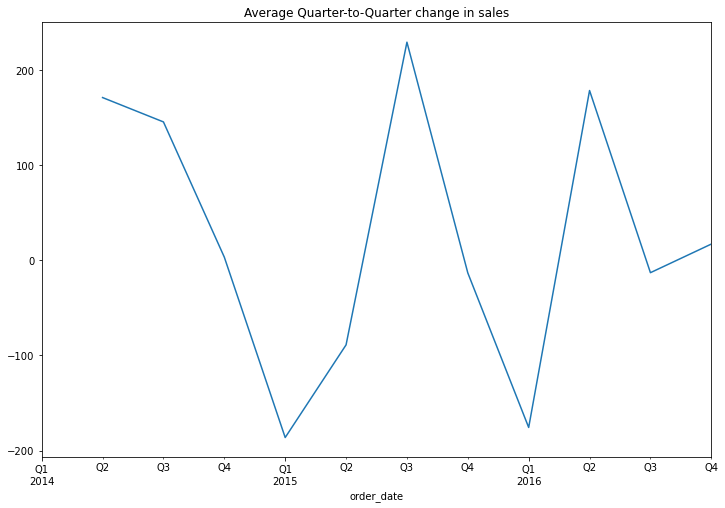

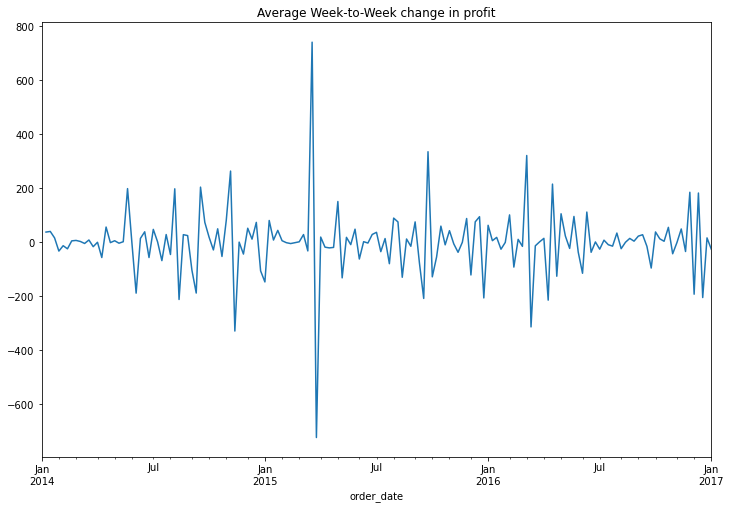

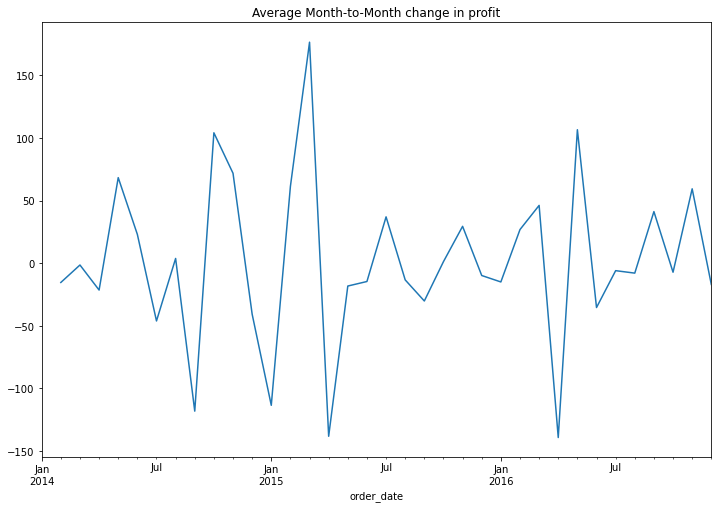

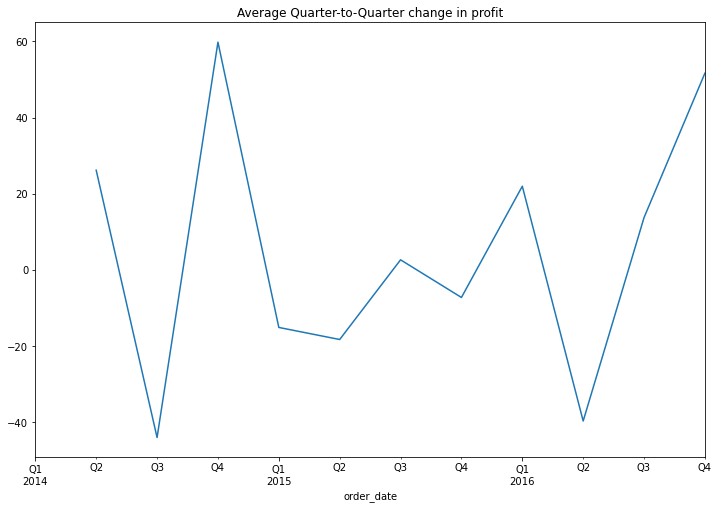

In [30]:
per = ['W', 'M', 'Q'] # list of periods by which to resample
per_name = ['Week', 'Month', 'Quarter'] # readable names of those periods
cols = ['sales', 'profit']
for col in cols:
    for i in range(len(per)):
        plt.figure(figsize=(12,8))
        train_resampled[col].resample(per[i]).mean().diff().plot(title=f'Average {per_name[i]}-to-{per_name[i]} change in {col}')
        plt.show()

#### Lag plots

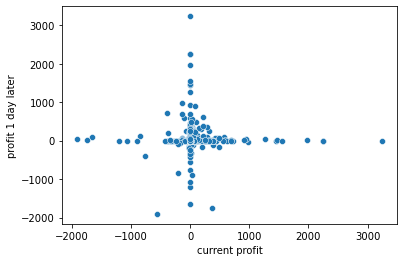

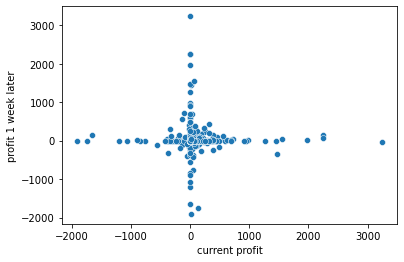

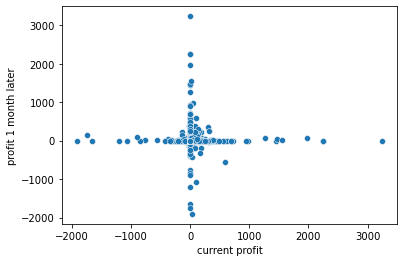

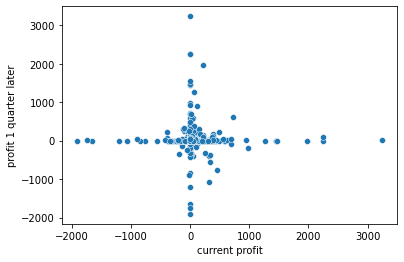

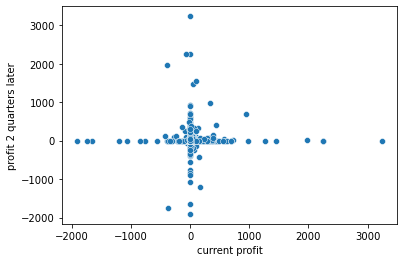

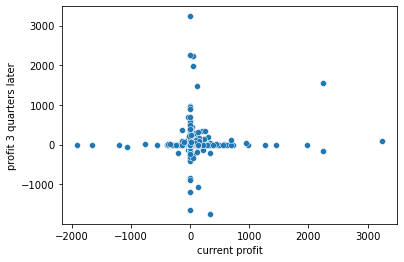

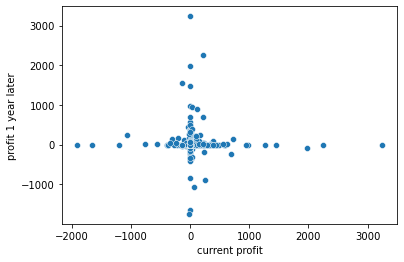

In [31]:
lag_times = [1, 7, 30, 30*3, 30*6, 30*9, 365]
lag_labels = ['1 day', '1 week', '1 month', '1 quarter', '2 quarters', '3 quarters', '1 year']

target = 'profit'
for lag_time, lag_label in zip(lag_times, lag_labels):
    sns.scatterplot(data=train_resampled, x=target, y=train_resampled[target].shift(-lag_time))
    plt.xlabel(f'current {target}')
    plt.ylabel(f'{target} {lag_label} later')
    plt.show()

#### seasonal decomposition

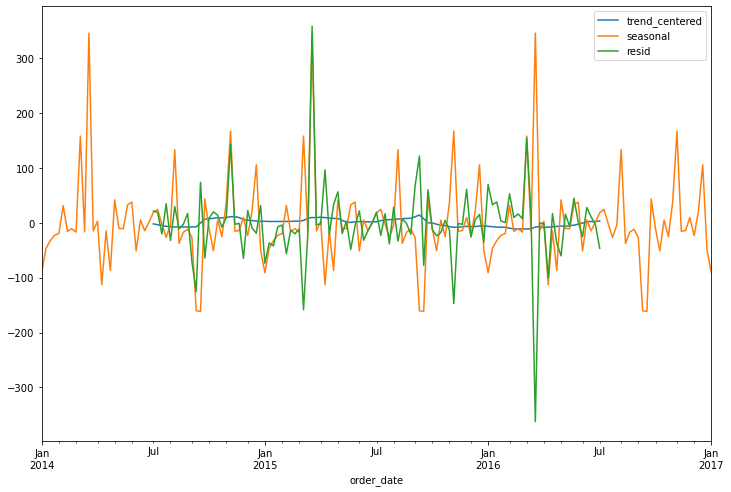

In [32]:
import statsmodels.api as sm

target = 'profit'
y = train_resampled[target].resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({'y': result.observed,
                             'trend': result.trend,
                             'seasonal': result.seasonal,
                             'resid': result.resid,})

decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot(figsize=(12,8))
plt.show()